In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
import time as tm
import Sprayer_PDE as SP

import pypolo2

# Environment -- PINNS

Set random seed to 2 in random, numpy, and torch.


100%|██████████| 50.0/50.0 [00:06<00:00,  8.18it/s]   


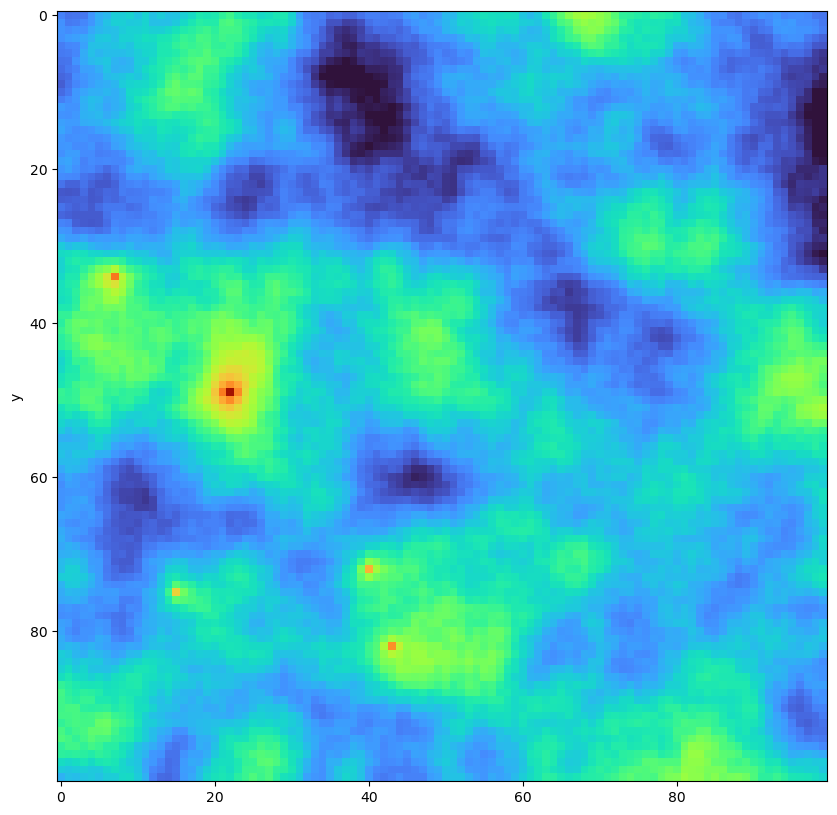

In [6]:
Setting = pypolo2.utilities.Config(grid_x = 100, grid_y = 100, sourcenum = 5)
rng = pypolo2.experiments.utilities.seed_everything(Setting = Setting)

# gengerate two set of random numbers for source locations
numbers = rng.randint(0, 99, size=Setting.sourcenum * 2)
pairs = rng.choice(numbers, size=(Setting.sourcenum, 2), replace=False)
for i in range(Setting.sourcenum):
    # number = rng.randint(100, 200, size=1)
    number = 100
    Setting.RR[i,0] = int(pairs[i,0])
    Setting.RR[i,1] = int(pairs[i,1])
    Setting.RR[i,2] = number

s = 1
Setting.R =  -8 * np.ones((Setting.grid_x, Setting.grid_y)) + 16.1 * np.random.random((Setting.grid_x, Setting.grid_y))
for i in range(Setting.sourcenum):
        Setting.R[Setting.RR[i,0],Setting.RR[i,1]] = s*Setting.RR[i,2]

env_model = SP.Diffusion_Model(x_range = Setting.grid_x, y_range = Setting.grid_y,\
                 initial_field =  Setting.env, R_field =  Setting.R, data_sprayer_train = Setting.data_sprayer_train, t_start = 0) # build model

Setting.env = env_model.solve(50)

import matplotlib.pyplot as plt
vmin = 0
vmax = 120
subfig_num = 1
test_show_row = 1
subfig_onerow = 1
fig, axes = plt.subplots(test_show_row, subfig_onerow, figsize=(10, 10))
fig.subplots_adjust(wspace = 0.4, hspace = 0.2)
line_color = np.random.random(3)
axes.set_ylabel("y")
im = axes.imshow(np.matrix(Setting.env).T, cmap='turbo',vmin = vmin, vmax = vmax)
# fig.colorbar(im)
filename = './outputs/png/overview_pollutiondistribution.png'
# 创建文件夹（如果不存在）
folder_path = os.path.dirname(filename)
os.makedirs(folder_path, exist_ok=True)

# 保存图片
plt.savefig(filename)

# allpoint_list = []
# env_list = []
# for i in range (Setting.task_extent[0],Setting.task_extent[1]):
#     for j in range (Setting.task_extent[2],Setting.task_extent[3]):
#         env_list.append(Setting.env[i,j])
# allpoint = np.array(allpoint_list)
# env = np.array(env_list)

# sprayeffect_all = pypolo2.objectives.sprayeffect.spray_effect(allpoint, allpoint, env, Setting.task_extent).ravel()
# computed_effect = np.zeros((Setting.task_extent[1]-Setting.task_extent[0],Setting.task_extent[3]-Setting.task_extent[2]))
# for i in range (Setting.task_extent[0],Setting.task_extent[1]):
#     for j in range (Setting.task_extent[2],Setting.task_extent[3]):
#         computed_effect[i,j] = sprayeffect_all[i*(Setting.task_extent[3]-Setting.task_extent[2])+j]


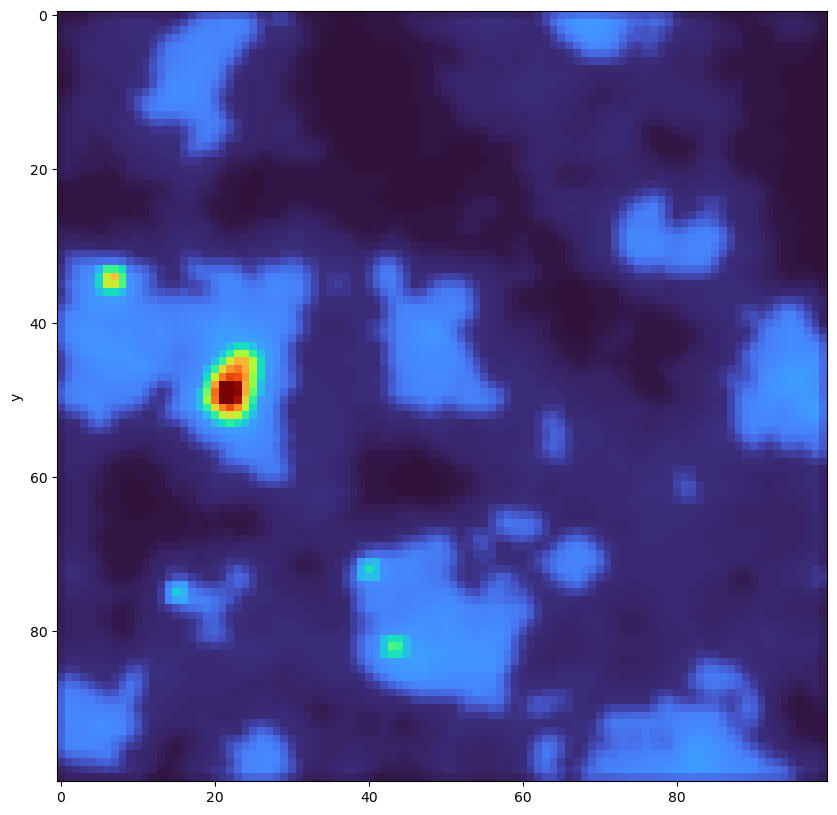

In [7]:
allpoint_list = []
env_list = []
for i in range (Setting.task_extent[0],Setting.task_extent[1]):
    for j in range (Setting.task_extent[2],Setting.task_extent[3]):
        allpoint_list.append([i, j, 0])
        env_list.append(Setting.env[i,j])
allpoint = np.array(allpoint_list)
env = np.array(env_list)


sprayeffect_all = pypolo2.objectives.sprayeffect.spray_effect(allpoint, allpoint, env, Setting.task_extent).ravel()
computed_effect = np.zeros((Setting.task_extent[1]-Setting.task_extent[0],Setting.task_extent[3]-Setting.task_extent[2]))
for i in range (Setting.task_extent[0],Setting.task_extent[1]):
    for j in range (Setting.task_extent[2],Setting.task_extent[3]):
        computed_effect[i,j] = sprayeffect_all[i*(Setting.task_extent[3]-Setting.task_extent[2])+j]
        
import matplotlib.pyplot as plt
vmin = 0
vmax = 70
subfig_num = 1
test_show_row = 1
subfig_onerow = 1
fig, axes = plt.subplots(test_show_row, subfig_onerow, figsize=(10, 10))
fig.subplots_adjust(wspace = 0.4, hspace = 0.2)
line_color = np.random.random(3)
axes.set_ylabel("y")
im = axes.imshow(np.matrix(computed_effect).T, cmap='turbo',vmin = vmin, vmax = vmax)

filename = './outputs/png/overview_computedeffect.png'
# 创建文件夹（如果不存在）
folder_path = os.path.dirname(filename)
os.makedirs(folder_path, exist_ok=True)

# 保存图片
plt.savefig(filename)